In [3]:
import numpy as np
import os
from PIL import Image
import re
import fnmatch
import pickle
from load_data import *
from networks import *
import matplotlib.pyplot as plt

In [2]:
FONTSIZE = 18
FIGURE_SIZE = (10,4)
FIGURE_SIZE2 = (10,10)

plt.rcParams.update({'font.size': FONTSIZE})
plt.rcParams['figure.figsize'] = FIGURE_SIZE2
# Default tick label size
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

In [2]:
ins_train, outs_train, ins_val, outs_val = get_data('data', .90, .10)

(16731, 160, 300, 1)
(18355, 160, 300, 1)


In [8]:
ins_train_2 = np.load('ins_train.npy')

In [9]:
print(ins_train_2.shape)

(35086, 160, 300, 1)


In [10]:
print(ins_train.shape)
print(outs_train.shape)

(35086, 160, 300, 1)
(35086, 2)


In [22]:
np.sum(outs_train, axis=0)

array([15815., 19895.])

In [161]:
n_filters = [5,5,5]
convolutions = [3,3,5]
pooling = [2,4, 4]
dense = [200,10]

In [162]:
model = create_classifier_network((ins_train.shape[1],ins_train.shape[2]),
                                  1,
                                  zip(n_filters,convolutions),
                                  pooling,
                                  dense,
                                  lrate=.001,
                                  p_dropout=.30,
                                  lambda_l2=.001)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C0 (Conv2D)                  (None, 158, 298, 5)       50        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 79, 149, 5)        0         
_________________________________________________________________
C1 (Conv2D)                  (None, 77, 147, 5)        230       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 19, 36, 5)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 15, 32, 5)         630       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 8, 5)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 120)              

In [163]:
generator = training_set_generator_images(ins_train, outs_train, batch_size=150)

In [164]:
outs_train.shape

(35710, 2)

In [167]:
history = model.fit_generator(generator, epochs=50, steps_per_epoch=2)

Epoch 1/50
2/2 [==============================] - 19s 10s/step - loss: 0.1441 - accuracy: 0.9600
Epoch 2/50
2/2 [==============================] - 19s 10s/step - loss: 0.0786 - accuracy: 0.9867
Epoch 3/50
2/2 [==============================] - 22s 11s/step - loss: 0.1534 - accuracy: 0.9500
Epoch 4/50
2/2 [==============================] - 39s 19s/step - loss: 0.1346 - accuracy: 0.9467
Epoch 5/50
2/2 [==============================] - 23s 11s/step - loss: 0.1111 - accuracy: 0.9667
Epoch 6/50
2/2 [==============================] - 21s 10s/step - loss: 0.0889 - accuracy: 0.9700
Epoch 7/50
2/2 [==============================] - 23s 11s/step - loss: 0.1690 - accuracy: 0.9467
Epoch 8/50
2/2 [==============================] - 18s 9s/step - loss: 0.1004 - accuracy: 0.9700
Epoch 9/50
2/2 [==============================] - 18s 9s/step - loss: 0.1147 - accuracy: 0.9800
Epoch 10/50
2/2 [==============================] - 19s 9s/step - loss: 0.0565 - accuracy: 0.9933
Epoch 11/50
2/2 [===============

In [170]:
# save model
model.save('model.h5')

In [3]:
model = keras.models.load_model('model.h5')

In [1]:
# Code given in previous homework assignments
def read_all_files(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []

    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

In [4]:
results = read_all_files('results', '*.pkl')

In [5]:
max = 0
index = 0
for i,r in enumerate(results):
    if r['predict_validation_eval'][1] > max:
        max = r['predict_validation_eval'][1]
        index = i
index

247

In [12]:
results[247]['fname_base']

'./results/ABET_conv_size_3_5_5_filters_5_10_10_pool_2_4_4_dense_100_10_drop_drop_0.20__l2_L2_0.000100'

In [11]:
model = keras.models.load_model('./results/ABET_conv_size_3_5_5_filters_5_10_10_pool_2_4_4_dense_100_10_drop_drop_0.20__l2_L2_0.000100_model')

In [3]:
model.save('model.h5')

In [30]:
preds = model.predict(ins_val)[:,0]

In [90]:
threshold = .50
actual_preds = preds > threshold
true_positive = np.sum(np.logical_and(actual_preds == 1, outs_val[:,0] == 1))
true_negative = np.sum(np.logical_and(actual_preds == 0, outs_val[:,1] == 1))
false_positive = np.sum(np.logical_and(actual_preds == 1, outs_val[:,1] == 1))
false_negative = np.sum(np.logical_and(actual_preds == 0,outs_val[:,0] == 1))

In [116]:
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)

1848
2037
3
11


In [119]:
fn_indices = np.where(np.logical_and(actual_preds == 0,outs_val[:,0] == 1) == True)
fp_indices = np.where(np.logical_and(actual_preds == 1, outs_val[:,1] == 1) == True)

(array([1923, 2703, 3154]),)

## False Negatives

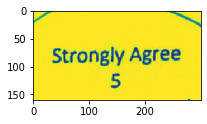

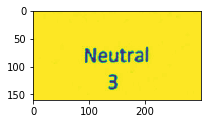

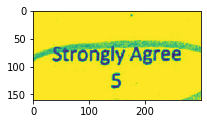

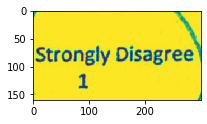

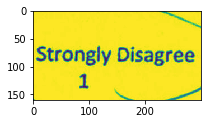

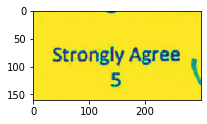

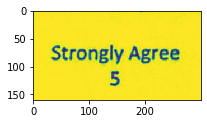

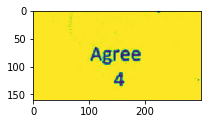

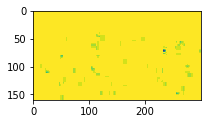

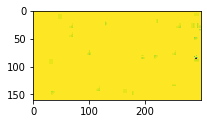

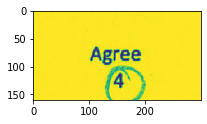

In [110]:
for i in fn_indices[0]:
    plt.figure(figsize=(3,3))
    plt.imshow(np.squeeze(ins_val[i,:,:]))

## False Positives

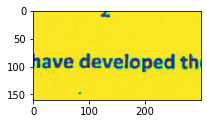

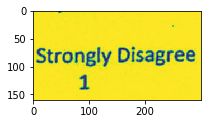

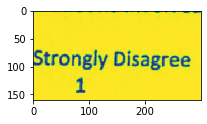

In [120]:
for i in fp_indices[0]:
    plt.figure(figsize=(3,3))
    plt.imshow(np.squeeze(ins_val[i,:,:]))